# Taller 6: Redes Nueronales

## Importar librerias

In [45]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

## Punto 1. Clasificación con redes neuronales - Datos iris

### Datos, Selección y División

Descarga Datos Iris

In [46]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Selección de Especimen

In [47]:
y = tf.keras.utils.to_categorical(iris.target, num_classes=3)
y_s = y[:,[0]]
y_s

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

División de datos (entrenamiento, validación, prueba)

In [48]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y_s, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

(96, 4)

In [49]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]]
[[ 0.16110746 -0.23717928  0.58382847  0.77996804]
 [ 1.01358158 -0.01611898  0.52732894  0.3865691 ]
 [-0.44780262 -1.56354107 -0.03766635 -0.2690958 ]]


### Modelo Base

Creación del modelo base (capa de entrada, capa oculta con 8 neuronas y una capa de salida comn una neurona para la única categoria)

In [51]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
base = tf.keras.Sequential()
base.add(tf.keras.layers.InputLayer(input_shape=(4,)))
base.add(tf.keras.layers.Dense(8, activation="relu"))
base.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [52]:
base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
base.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Entrenamiento del modelo base

In [54]:
history_base = base.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.2240 - loss: 1.0281 - val_accuracy: 0.3750 - val_loss: 0.9468
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2344 - loss: 1.0015 - val_accuracy: 0.4167 - val_loss: 0.9284
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2344 - loss: 0.9764 - val_accuracy: 0.4167 - val_loss: 0.9111
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2396 - loss: 0.9528 - val_accuracy: 0.4583 - val_loss: 0.8947
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2448 - loss: 0.9303 - val_accuracy: 0.4583 - val_loss: 0.8791
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2617 - loss: 0.9087 - val_accuracy: 0.4583 - val_loss: 0.8641
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2669 - loss: 0.8879 - val_accuracy: 0.4583 - val_loss: 0.8497
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3281 - loss: 0.8683 - val_accuracy: 0.4583 - val_loss

Grafica historial de pérdida de entrenamiento y validación

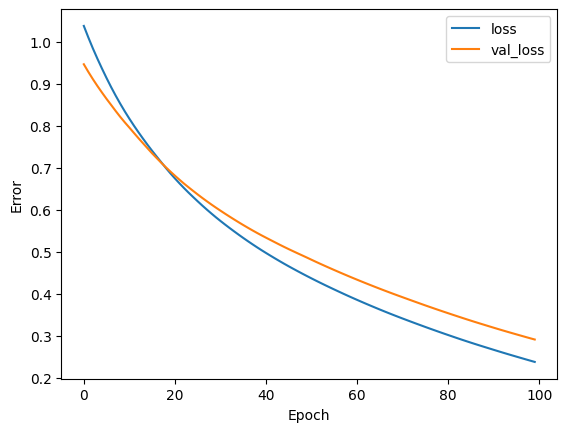

In [55]:
plt.plot(history_base.history['loss'], label='loss')
plt.plot(history_base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

### Metricas

In [56]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred_base = base.predict(X_test)
#y_pred_base_classes = np.argmax(y_pred_base, axis=1)
#y_pred_base_classes
y_pred_base

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.24413382],
       [0.87276167],
       [0.1240546 ],
       [0.25993246],
       [0.22727011],
       [0.8336753 ],
       [0.28448078],
       [0.24816334],
       [0.10424528],
       [0.22453779],
       [0.31294298],
       [0.7319572 ],
       [0.86630905],
       [0.78166807],
       [0.8988245 ],
       [0.33100435],
       [0.24451852],
       [0.17622238],
       [0.23743472],
       [0.18944943],
       [0.80211186],
       [0.27270854],
       [0.84149885],
       [0.19264391],
       [0.20522238],
       [0.22748235],
       [0.13706017],
       [0.28495345],
       [0.7029723 ],
       [0.75634396]], dtype=float32)

In [58]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [59]:
print(y_test[0][0])
print(y_pred_base[0][0])

0.0
0.24413382


[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


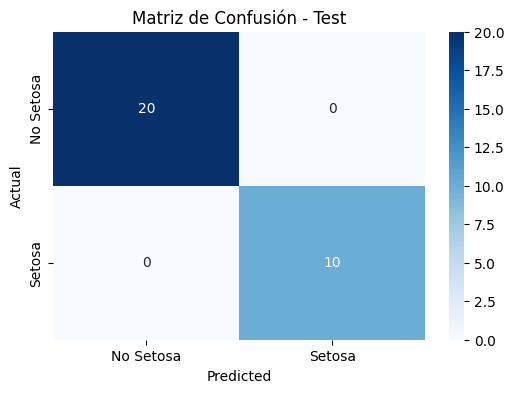

In [64]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_base = to_binary_predictions(y_pred_base)

print(y_pred_base)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_base)
precision = precision_score(y_test, y_pred_base)
recall = recall_score(y_test, y_pred_base)
f1 = f1_score(y_test, y_pred_base)
f2 = fbeta_score(y_test, y_pred_base, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_base)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
--- MÉTRICAS DEL MODELO (Validación) ---
Accuracy: 0.9583
Precision: 1.0000
Recall: 0.8750
F1 Score: 0.9333
F2 Score: 0.8974
ROC AUC Score: 0.9375


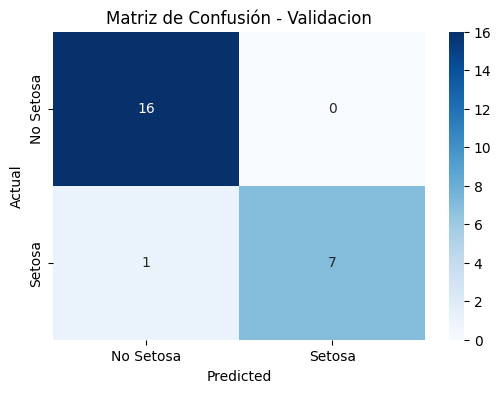

In [63]:



# Evaluación en conjunto de validación
y_pred_base_validation = base.predict(X_valid)
y_pred_base_validation = to_binary_predictions(y_pred_base_validation)


accuracy = accuracy_score(y_valid, y_pred_base_validation)
precision = precision_score(y_valid, y_pred_base_validation)
recall = recall_score(y_valid, y_pred_base_validation)
f1 = f1_score(y_valid, y_pred_base_validation)
f2 = fbeta_score(y_valid, y_pred_base_validation, beta=2)
roc_auc = roc_auc_score(y_valid, y_pred_base_validation)

print("--- MÉTRICAS DEL MODELO (Validación) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


# Matriz de confusión
conf_matrix = confusion_matrix(y_valid, y_pred_base_validation)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels =  ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Validacion')
plt.show()



### Nuevos modelos 

**modelo 3 capas y (10,15,20) neuronas**

In [66]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m1 = tf.keras.Sequential()
m1.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m1.add(tf.keras.layers.Dense(10, activation="relu"))
m1.add(tf.keras.layers.Dense(15, activation="relu"))
m1.add(tf.keras.layers.Dense(20, activation="relu"))
m1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [67]:
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556 (2.17 KB)

 Trainable params: 556 (2.17 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
m1.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [71]:
history_m1 = m1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5716 - loss: 0.6852 - val_accuracy: 0.4583 - val_loss: 0.6989
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6706 - loss: 0.6723 - val_accuracy: 0.5833 - val_loss: 0.6880
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7318 - loss: 0.6603 - val_accuracy: 0.6250 - val_loss: 0.6777
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7487 - loss: 0.6491 - val_accuracy: 0.6667 - val_loss: 0.6681
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7487 - loss: 0.6387 - val_accuracy: 0.6667 - val_loss: 0.6594
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7487 - loss: 0.6291 - val_accuracy: 0.6667 - val_loss: 0.6514
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7487 - loss: 0.6201 - val_accuracy: 0.6667 - val_loss: 0.6439
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7487 - loss: 0.6117 - val_accuracy: 0.6667 - val_loss

In [72]:
y_pred_m1 = m1.predict(X_test)
y_pred_m1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[0.11419924],
       [0.6456411 ],
       [0.00072705],
       [0.10892278],
       [0.04160241],
       [0.6139474 ],
       [0.27359125],
       [0.01814576],
       [0.00996859],
       [0.14790769],
       [0.05749428],
       [0.4536767 ],
       [0.6191384 ],
       [0.499717  ],
       [0.64606684],
       [0.19749276],
       [0.01638729],
       [0.11043493],
       [0.13512772],
       [0.009957  ],
       [0.5219871 ],
       [0.07054286],
       [0.6114515 ],
       [0.0123325 ],
       [0.03090267],
       [0.01460672],
       [0.00549673],
       [0.01669337],
       [0.4570798 ],
       [0.48880458]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 0.8667
Precision: 1.0000
Recall: 0.6000
F1 Score: 0.7500
F2 Score: 0.6522
ROC AUC Score: 0.8000


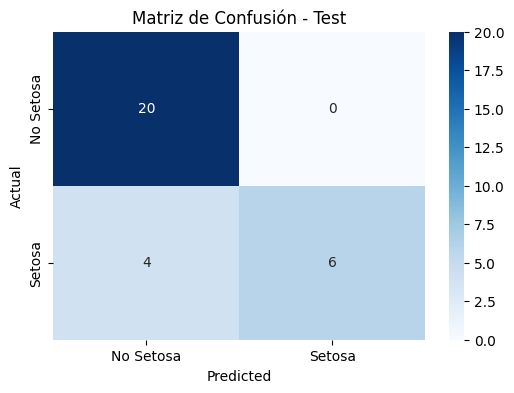

In [73]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_m1 = to_binary_predictions(y_pred_m1)

print(y_pred_m1)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m1)
precision = precision_score(y_test, y_pred_m1)
recall = recall_score(y_test, y_pred_m1)
f1 = f1_score(y_test, y_pred_m1)
f2 = fbeta_score(y_test, y_pred_m1, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m1)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 5 capas y (5,7,21,30,5) neuronas**

In [80]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m2 = tf.keras.Sequential()
m2.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(7, activation="relu"))
m2.add(tf.keras.layers.Dense(21, activation="relu"))
m2.add(tf.keras.layers.Dense(30, activation="relu"))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [81]:
m2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056 (4.12 KB)

 Trainable params: 1,056 (4.12 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
m2.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [83]:
history_m2 = m2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.4674 - loss: 0.6755 - val_accuracy: 0.5833 - val_loss: 0.6697
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6159 - loss: 0.6658 - val_accuracy: 0.6667 - val_loss: 0.6587
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7956 - loss: 0.6564 - val_accuracy: 0.8333 - val_loss: 0.6487
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8802 - loss: 0.6478 - val_accuracy: 0.8750 - val_loss: 0.6395
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9232 - loss: 0.6400 - val_accuracy: 0.9167 - val_loss: 0.6317
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9453 - loss: 0.6329 - val_accuracy: 0.9167 - val_loss: 0.6246
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9453 - loss: 0.6266 - val_accuracy: 0.9167 - val_loss: 0.6183
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9453 - loss: 0.6209 - val_accuracy: 0.9167 - val_loss

In [84]:
y_pred_m2 = m2.predict(X_test)
y_pred_m2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[0.23449233],
       [0.94394296],
       [0.22158974],
       [0.2316744 ],
       [0.2425088 ],
       [0.92879826],
       [0.22676252],
       [0.23359405],
       [0.20435321],
       [0.22529998],
       [0.23491311],
       [0.9475911 ],
       [0.95489025],
       [0.9506471 ],
       [0.9734139 ],
       [0.24485038],
       [0.22219335],
       [0.21229936],
       [0.22395588],
       [0.2183086 ],
       [0.9579995 ],
       [0.2280769 ],
       [0.9473329 ],
       [0.21952653],
       [0.2845613 ],
       [0.2271908 ],
       [0.22000186],
       [0.2286977 ],
       [0.93104094],
       [0.9452593 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


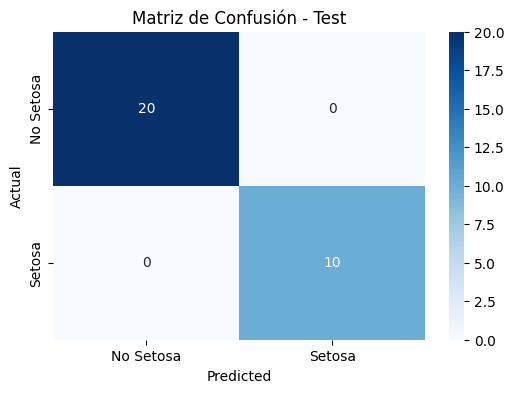

In [85]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_m2 = to_binary_predictions(y_pred_m2)

print(y_pred_m2)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m2)
precision = precision_score(y_test, y_pred_m2)
recall = recall_score(y_test, y_pred_m2)
f1 = f1_score(y_test, y_pred_m2)
f2 = fbeta_score(y_test, y_pred_m2, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m2)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 4 capas y (8,20,35,46) neuronas**

In [86]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m3 = tf.keras.Sequential()
m3.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m3.add(tf.keras.layers.Dense(8, activation="relu"))
m3.add(tf.keras.layers.Dense(20, activation="relu"))
m3.add(tf.keras.layers.Dense(35, activation="relu"))
m3.add(tf.keras.layers.Dense(46, activation="relu"))
m3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [87]:
m3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │           735 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         1,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            47 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658 (10.38 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
m3.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [89]:
history_m3 = m3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.7812 - loss: 0.6773 - val_accuracy: 0.9167 - val_loss: 0.6728
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8698 - loss: 0.6729 - val_accuracy: 0.9167 - val_loss: 0.6690
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9635 - loss: 0.6685 - val_accuracy: 0.9167 - val_loss: 0.6651
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9688 - loss: 0.6640 - val_accuracy: 0.9583 - val_loss: 0.6612
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9779 - loss: 0.6594 - val_accuracy: 0.9583 - val_loss: 0.6574
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.6548 - val_accuracy: 0.9583 - val_loss: 0.6534
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.6502 - val_accuracy: 0.9583 - val_loss: 0.6495
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.6455 - val_accuracy: 0.9583 - val_loss

In [90]:
y_pred_m3 = m3.predict(X_test)
y_pred_m3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.13388854],
       [0.941748  ],
       [0.08458814],
       [0.17178087],
       [0.11188425],
       [0.9007232 ],
       [0.19309866],
       [0.13251655],
       [0.09319875],
       [0.1469587 ],
       [0.14362946],
       [0.8698106 ],
       [0.9346782 ],
       [0.8912678 ],
       [0.96213204],
       [0.15828465],
       [0.14099975],
       [0.12775533],
       [0.16405328],
       [0.15683436],
       [0.911549  ],
       [0.1722542 ],
       [0.91575366],
       [0.15399463],
       [0.12177584],
       [0.14457104],
       [0.10263822],
       [0.11926569],
       [0.8494926 ],
       [0.8852642 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


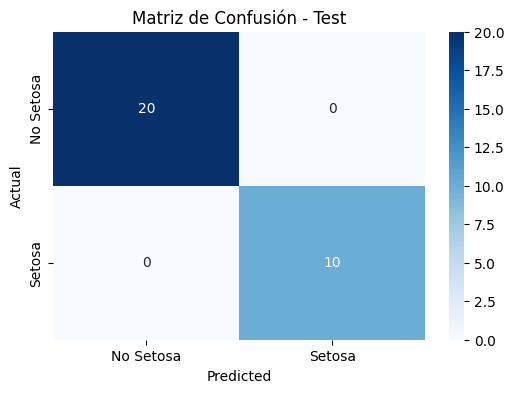

In [91]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_m3 = to_binary_predictions(y_pred_m3)

print(y_pred_m3)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m3)
precision = precision_score(y_test, y_pred_m3)
recall = recall_score(y_test, y_pred_m3)
f1 = f1_score(y_test, y_pred_m3)
f2 = fbeta_score(y_test, y_pred_m3, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m3)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m3)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

## Punto 2: Clasificacion con redes neuronales - Datos heart

## Modelo Base

In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [44]:
df = pd.read_csv('heart.csv')